<a href="https://colab.research.google.com/github/1978Biswajit/NewsClassificationTFIDF-Using-Artificial-Intelligence/blob/main/NewsClassificationTFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
news_data = pd.read_csv('/content/drive/MyDrive/news_dataset_1k.csv')

In [ ]:
news_data

,Headlines,Body,Category
0,Govt targets $150b remittance in 8th Five-Year...,The government has set an ambitious target of ...,BUSINESS
1,Extended transition period to let address Covi...,The committee suggested Bangladesh prioritise ...,BUSINESS
2,Record jute price forces 40 mills to shutter o...,Jute mills are closing as they are failing to ...,BUSINESS
3,Unilever Consumer Care profit slumps,"Unilever Consumer Care, formerly known as Glax...",BUSINESS
4,NBFIs ordered to ensure proper use of loans,The central bank yesterday ordered non-bank fi...,BUSINESS
...,...,...,...
994,"Gamblers at it again, insurance stocks soar on...",Insurance stocks came under the spotlight agai...,BUSINESS
995,Utilise demographic dividend in time,Bangladesh needs to properly utilise its youth...,BUSINESS
996,"Futures drop ahead of Powell, Yellen testimonies",US stock index futures slid on Tuesday as ener...,BUSINESS
997,UK unemployment dips to 5pc,Britain's unemployment rate dipped to 5.0 per ...,BUSINESS


In [ ]:
y = news_data['Category']

In [ ]:
y

0      BUSINESS
1      BUSINESS
2      BUSINESS
3      BUSINESS
4      BUSINESS
         ...   
994    BUSINESS
995    BUSINESS
996    BUSINESS
997    BUSINESS
998    BUSINESS
Name: Category, Length: 999, dtype: object

In [ ]:
news_data.Category.unique()

array(['BUSINESS', 'SPORTS', 'CITY', 'COUNTRY', 'WORLD', '    BUSINESS'],
      dtype=object)

In [ ]:
y = y.to_numpy().astype('str')

In [ ]:
y

array(['BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS',
       'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS',
       'BUSINESS', 'BUSINESS', 'BUSINESS', 'SPORTS', 'SPORTS', 'SPORTS',
       'SPORTS', 'SPORTS', 'SPORTS', 'CITY', 'CITY', 'CITY', 'CITY',
       'CITY', 'CITY', 'CITY', 'CITY', 'CITY', 'CITY', 'CITY', 'CITY',
       'COUNTRY', 'COUNTRY', 'WORLD', 'WORLD', 'WORLD', 'WORLD', 'WORLD',
       'WORLD', 'WORLD', 'WORLD', '    BUSINESS', 'BUSINESS', 'BUSINESS',
       'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS',
       'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS', 'SPORTS', 'SPORTS',
       'SPORTS', 'SPORTS', 'SPORTS', 'SPORTS', 'CITY', 'CITY', 'CITY',
       'CITY', 'CITY', 'CITY', 'CITY', 'CITY', 'CITY', 'CITY', 'CITY',
       'CITY', 'CITY', 'CITY', 'CITY', 'COUNTRY', 'COUNTRY', 'COUNTRY',
       'WORLD', 'WORLD', 'WORLD', 'WORLD', 'WORLD', 'WORLD', 'WORLD',
       'WORLD', 'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS',
       'BUSINES

In [ ]:
news_body = news_data.iloc[:,1]

In [ ]:
news_body

0      The government has set an ambitious target of ...
1      The committee suggested Bangladesh prioritise ...
2      Jute mills are closing as they are failing to ...
3      Unilever Consumer Care, formerly known as Glax...
4      The central bank yesterday ordered non-bank fi...
                             ...                        
994    Insurance stocks came under the spotlight agai...
995    Bangladesh needs to properly utilise its youth...
996    US stock index futures slid on Tuesday as ener...
997    Britain's unemployment rate dipped to 5.0 per ...
998    Shasha Garments is going to invest $5 million ...
Name: Body, Length: 999, dtype: object

In [ ]:
news_body = news_data['Body']

In [ ]:
t=news_body.to_numpy()

In [ ]:
t

array(['The government has set an ambitious target of earning $150 billion through remittance between July 2020 and June 2025, according to a document on the 8th Five-Year Plan.\nTo reach the target, the expatriate\'s welfare and employment ministry will roll out an overseas employment market expansion roadmap developed by a new Market Expansion Task-Force.\nThe target was revealed in a 10-point agenda on overseas employment and the well-being of migrant workers of the 8th Five-Year Plan.\nThe document -- 8th Five Year Plan: July 2020 to June 2025- Promoting Prosperity and Fostering Inclusiveness -- said Bangladesh had experienced strong growth in overseas employment and migration.\n"There is confidence among stakeholders that overseas employment and migration could play a more substantive role in the country\'s development, beyond just counting remittance," it added.',
       'The committee suggested Bangladesh prioritise policy formulation in the areas to support its development duri

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
import re
documents = []
stemmer = WordNetLemmatizer()
for sen in range(0, len(t)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(t[sen]))
    # remove all single characters from middle
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Converting to Lowercase
    document = document.lower()
    document = re.sub("^\d+\s|\s\d+\s|\s\d+$", ' ', document)
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [ ]:
documents

['the government ha set an ambitious target of earning billion through remittance between july and june according to document on the 8th five year plan to reach the target the expatriate welfare and employment ministry will roll out an overseas employment market expansion roadmap developed by new market expansion task force the target wa revealed in point agenda on overseas employment and the well being of migrant worker of the 8th five year plan the document 8th five year plan july to june promoting prosperity and fostering inclusiveness said bangladesh had experienced strong growth in overseas employment and migration there is confidence among stakeholder that overseas employment and migration could play more substantive role in the country development beyond just counting remittance it added',
 'the committee suggested bangladesh prioritise policy formulation in the area to support it development during the preparatory and smooth transition period and beyond the strategy is needed t

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer( encoding='utf-8',stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
terms = vectorizer.get_feature_names()
print(len(terms))

11216


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X.shape

(999, 11216)

In [ ]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
terms

['000',
 '0000',
 '00am',
 '00pm',
 '016',
 '018',
 '02',
 '03',
 '04',
 '041',
 '043',
 '044',
 '04am',
 '057',
 '06',
 '063',
 '07',
 '07am',
 '08',
 '09',
 '10',
 '100th',
 '105',
 '10am',
 '10m',
 '10th',
 '11',
 '110',
 '117th',
 '11am',
 '11th',
 '12',
 '122',
 '122mm',
 '128',
 '12nd',
 '12th',
 '13',
 '135',
 '138',
 '13th',
 '14',
 '142',
 '143',
 '144',
 '14th',
 '15',
 '15am',
 '15pm',
 '15th',
 '16',
 '163',
 '166',
 '17',
 '170',
 '17th',
 '18',
 '1800',
 '1841',
 '185',
 '1881',
 '18th',
 '19',
 '1957',
 '1962',
 '197',
 '1970s',
 '1971',
 '1972',
 '1990s',
 '19th',
 '1am',
 '1b',
 '20',
 '200',
 '2000s',
 '2001',
 '2003',
 '2004',
 '2006',
 '2007',
 '2008',
 '2009',
 '200km',
 '2010',
 '2012',
 '2013',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2022the',
 '2025',
 '2030s',
 '20am',
 '20ft',
 '21',
 '21st',
 '22',
 '225',
 '22nd',
 '23',
 '233',
 '24',
 '245',
 '25',
 '250',
 '26',
 '26th',
 '271',
 '273',
 '279',
 '28',
 '283',
 '29',
 '29t

In [ ]:
print(terms[10344])

tougher


In [ ]:
Y=[]
for i in range(len(y)):
    if y[i] =='SPORTS':
      Y.append(0)
    elif y[i] == 'CITY':
      Y.append(1)
    elif y[i] == 'COUNTRY':
      Y.append(1)
    elif y[i] == 'WORLD':
      Y.append(2)
    elif y[i] == 'BUSINESS':
      Y.append(3)
    else:
      Y.append(3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[30  3  0  0]
 [ 0 55  1  8]
 [ 0  8 30  3]
 [ 0  5  2 55]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.77      0.86      0.81        64
           2       0.91      0.73      0.81        41
           3       0.83      0.89      0.86        62

    accuracy                           0.85       200
   macro avg       0.88      0.85      0.86       200
weighted avg       0.86      0.85      0.85       200

0.85


In [ ]:
pred_prob = classifier.predict_proba(X_test)

In [ ]:
len(pred_prob)

200

In [ ]:
n_classes = 4
#Multiclass ROC curve
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
from keras.utils import np_utils
encoded_train_y = np_utils.to_categorical(y_train)
encoded_test_y = np_utils.to_categorical(y_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(encoded_test_y[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
encoded_test_y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],


In [ ]:
pred_prob

array([[0.085     , 0.225     , 0.517     , 0.173     ],
       [0.039     , 0.184     , 0.575     , 0.202     ],
       [0.029     , 0.504     , 0.215     , 0.252     ],
       [0.018     , 0.397     , 0.089     , 0.496     ],
       [0.043     , 0.1895    , 0.193     , 0.5745    ],
       [0.125     , 0.25      , 0.261     , 0.364     ],
       [0.015     , 0.358     , 0.074     , 0.553     ],
       [0.017     , 0.62766667, 0.113     , 0.24233333],
       [0.064     , 0.558     , 0.215     , 0.163     ],
       [0.05      , 0.64866667, 0.134     , 0.16733333],
       [0.185     , 0.257     , 0.358     , 0.2       ],
       [0.677     , 0.13766667, 0.101     , 0.08433333],
       [0.035     , 0.25633333, 0.581     , 0.12766667],
       [0.084     , 0.603     , 0.159     , 0.154     ],
       [0.007     , 0.07      , 0.072     , 0.851     ],
       [0.155     , 0.216     , 0.402     , 0.227     ],
       [0.001     , 0.06      , 0.021     , 0.918     ],
       [0.007     , 0.14      ,

In [ ]:
roc_auc

{0: 0.9990927236436219,
 1: 0.9546185661764706,
 2: 0.9907961343764381,
 3: 0.9646446937821411}

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(encoded_test_y.ravel(), pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
#compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

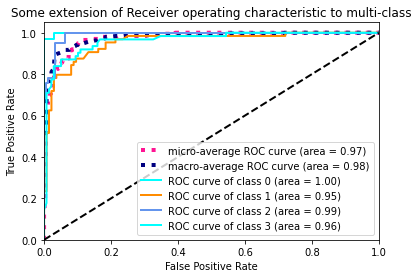

<Figure size 432x288 with 0 Axes>

In [ ]:
from itertools import cycle
import matplotlib.pyplot as plt
import pickle
import h5py
# Plot all ROC curves
lw = 2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc-cnn.png')

In [ ]:
from sklearn.feature_selection import f_classif
sel = f_classif(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    75    84 ... 11184 11191 11211] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
sel[1]

array([0.0026079 , 0.58398239, 0.08807737, ..., 0.09924708, 0.53601557,
       0.58398239])

In [ ]:
sel[1][0]

0.0026078992160073226

Streaming output truncated to the last 5000 lines.
Feature 6216: nan
Feature 6217: 0.293612
Feature 6218: nan
Feature 6219: 0.268774
Feature 6220: 0.286040
Feature 6221: 0.286040
Feature 6222: 0.583982
Feature 6223: 0.286040
Feature 6224: 0.583982
Feature 6225: 0.286040
Feature 6226: 0.583982
Feature 6227: 0.015689
Feature 6228: nan
Feature 6229: nan
Feature 6230: 0.642220
Feature 6231: 0.607747
Feature 6232: 0.000000
Feature 6233: 0.155280
Feature 6234: 0.583982
Feature 6235: 0.001758
Feature 6236: 0.095257
Feature 6237: 0.536016
Feature 6238: 0.245259
Feature 6239: 0.043519
Feature 6240: 0.117392
Feature 6241: 0.536016
Feature 6242: 0.099247
Feature 6243: 0.536016
Feature 6244: 0.286040
Feature 6245: 0.272217
Feature 6246: 0.418199
Feature 6247: 0.241739
Feature 6248: 0.536016
Feature 6249: 0.099247
Feature 6250: 0.583982
Feature 6251: 0.286040
Feature 6252: 0.536016
Feature 6253: 0.583982
Feature 6254: nan
Feature 6255: 0.536016
Feature 6256: 0.099247
Feature 6257: 0.583982
Feature 

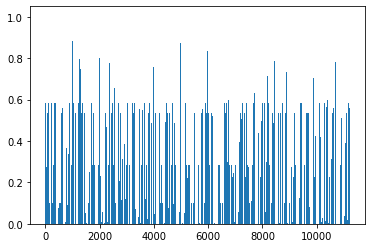

In [ ]:
# feature selection based on p values
from matplotlib import pyplot
selected_features = []
for i in range(len(sel[1])):
  if sel[1][i]<0.01:
    selected_features.append(i)
  print('Feature %d: %f' % (i, sel[1][i]))
# plot the scores
pyplot.bar([i for i in range(len(sel[1]))], sel[1])
pyplot.show()

In [ ]:
len(selected_features)

830

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# configure to select all features
fs = SelectKBest(score_func=f_classif, k=20)
# learn relationship from training data
fs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    75    84 ... 11184 11191 11211] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=20, score_func=<function f_classif at 0x7fefb4e5b440>)

Streaming output truncated to the last 5000 lines.
Feature 6216: nan
Feature 6217: 1.241333
Feature 6218: nan
Feature 6219: 1.313470
Feature 6220: 1.262723
Feature 6221: 1.262723
Feature 6222: 0.648589
Feature 6223: 1.262723
Feature 6224: 0.648589
Feature 6225: 1.262723
Feature 6226: 0.648589
Feature 6227: 3.476181
Feature 6228: nan
Feature 6229: nan
Feature 6230: 0.558998
Feature 6231: 0.611372
Feature 6232: 25.864414
Feature 6233: 1.750139
Feature 6234: 0.648589
Feature 6235: 5.067869
Feature 6236: 2.127913
Feature 6237: 0.727009
Feature 6238: 1.387576
Feature 6239: 2.720134
Feature 6240: 1.967368
Feature 6241: 0.727009
Feature 6242: 2.096485
Feature 6243: 0.727009
Feature 6244: 1.262723
Feature 6245: 1.303120
Feature 6246: 0.945212
Feature 6247: 1.399227
Feature 6248: 0.727009
Feature 6249: 2.096485
Feature 6250: 0.648589
Feature 6251: 1.262723
Feature 6252: 0.727009
Feature 6253: 0.648589
Feature 6254: nan
Feature 6255: 0.727009
Feature 6256: 2.096485
Feature 6257: 0.648589
Feature

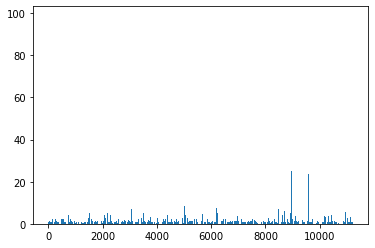

In [ ]:
# feature selection based on f-statistics
selected_features = []
for i in range(len(fs.scores_)):
  if fs.scores_[i]>15:
    selected_features.append(i)
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
len(selected_features)

72

In [ ]:
X_train_pd = pd.DataFrame(X_train)

In [ ]:
X_train_pd.columns=terms

In [ ]:
X_train_pd.iloc[:,selected_features]

,ahead,bangladesh,bank,best,biden,business,captain,cent,champion,championship,china,club,coach,company,cricket,cup,defeat,dhaka,england,final,first,football,fourth,game,goal,host,la,league,leg,liga,madrid,market,match,member,national,per,play,played,player,playing,point,police,premier,price,run,score,scored,scoring,season,second,series,seven,seventh,skipper,spinner,squad,stadium,state,station,team,test,third,title,tournament,un,upazila,victory,wicket,win,winning,yesterday,zealand
0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.057138,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.068286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.070833,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.082528,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.039915,0.0
2,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.215962,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.065213,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.12016,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058025,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081896,0.0,0.046513,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.266981,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.126098,0.0,0.0,0.055062,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
795,0.0,0.133285,0.122692,0.0,0.00000,0.0,0.0,0.181895,0.0,0.0,0.000000,0.0,0.0,0.063260,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.131239,0.0,0.0,0.062279,0.171819,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.07211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
796,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.060695,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.036037,0.0
797,0.0,0.046771,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,

In [ ]:
X_train_fs = X_train_pd.to_numpy()

In [ ]:
X_test_pd = pd.DataFrame(X_test)
X_test_pd.columns=terms
X_test_pd.iloc[:,selected_features]
X_test_fs = X_test_pd.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_fs = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier_fs.fit(X_train_fs, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_fs = classifier_fs.predict(X_test_fs)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_fs))
print(classification_report(y_test,y_pred_fs))
print(accuracy_score(y_test, y_pred_fs))

[[30  3  0  0]
 [ 0 55  1  8]
 [ 0  8 30  3]
 [ 0  5  2 55]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.77      0.86      0.81        64
           2       0.91      0.73      0.81        41
           3       0.83      0.89      0.86        62

    accuracy                           0.85       200
   macro avg       0.88      0.85      0.86       200
weighted avg       0.86      0.85      0.85       200

0.85


In [ ]:
from sklearn import linear_model, tree, ensemble

In [ ]:
clf_adabost=AdaBoostClassifier(n_estimators=1000)
clf_adabost.fit(X_train_fs, y_train)
y_pred_adboost = clf_adabost.predict(X_test_fs)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_adboost))
print(classification_report(y_test,y_pred_adboost))
print(accuracy_score(y_test, y_pred_adboost))

[[21  5  1  6]
 [ 0 43  7 14]
 [ 0  6 31  4]
 [ 0 23  9 30]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        33
           1       0.56      0.67      0.61        64
           2       0.65      0.76      0.70        41
           3       0.56      0.48      0.52        62

    accuracy                           0.62       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.65      0.62      0.63       200

0.625


In [ ]:
min_samples_leaf=5
n_estimators=10
criterion='entropy'
max_depth=[15]

In [ ]:
clf_gdt = ensemble.GradientBoostingClassifier(n_estimators=n_estimators,min_samples_leaf=min_samples_leaf)
clf_gdt.fit(X_train_fs, y_train)
y_pred_gdt = clf_gdt.predict(X_test_fs)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_gdt))
print(classification_report(y_test,y_pred_gdt))
print(accuracy_score(y_test, y_pred_gdt))

[[22 11  0  0]
 [ 0 52  2 10]
 [ 1 17 21  2]
 [ 2 12  4 44]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.57      0.81      0.67        64
           2       0.78      0.51      0.62        41
           3       0.79      0.71      0.75        62

    accuracy                           0.69       200
   macro avg       0.75      0.68      0.70       200
weighted avg       0.73      0.69      0.70       200

0.695


In [ ]:
clf_dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,criterion=criterion,max_depth=15)
clf_dt.fit(X_train_fs, y_train)
y_pred_dt= clf_dt.predict(X_test_fs)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))

[[21  8  2  2]
 [ 1 47  8  8]
 [ 1 13 26  1]
 [ 6 12  6 38]]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        33
           1       0.59      0.73      0.65        64
           2       0.62      0.63      0.63        41
           3       0.78      0.61      0.68        62

    accuracy                           0.66       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.67      0.66      0.66       200

0.66


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_svm = SVC()
clf_svm.fit(X_train_fs, y_train)
y_pred_svm= clf_svm.predict(X_test_fs)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))

[[27  5  0  1]
 [ 0 57  1  6]
 [ 0  9 32  0]
 [ 0  6  1 55]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.74      0.89      0.81        64
           2       0.94      0.78      0.85        41
           3       0.89      0.89      0.89        62

    accuracy                           0.85       200
   macro avg       0.89      0.84      0.86       200
weighted avg       0.87      0.85      0.86       200

0.855


In [ ]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_fs, y_train)
y_pred_knn= clf_knn.predict(X_test_fs)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

[[30  2  0  1]
 [ 0 50  5  9]
 [ 0  3 38  0]
 [ 1  8  1 52]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.79      0.78      0.79        64
           2       0.86      0.93      0.89        41
           3       0.84      0.84      0.84        62

    accuracy                           0.85       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.85      0.85      0.85       200

0.85
